
<h1 id="How-to-catch-an-alligator">How to catch an alligator<a class="anchor-link" href="#How-to-catch-an-alligator">¶</a></h1><h2 id="Getting-strategic-in-the-Statewide-Nuisance-Alligator-Program-(SNAP)">Getting strategic in the Statewide Nuisance Alligator Program (SNAP)<a class="anchor-link" href="#Getting-strategic-in-the-Statewide-Nuisance-Alligator-Program-(SNAP)">¶</a></h2>



<h3 id="Preamble">Preamble<a class="anchor-link" href="#Preamble">¶</a></h3><p>Florida Fish and Wildlife Conservation Commission's Statewide Alligator Harvest data between 2000 and 2016 is available at: <a href="http://myfwc.com/wildlifehabitats/managed/alligator/harvest/data-export/">http://myfwc.com/wildlifehabitats/managed/alligator/harvest/data-export/</a></p>
<p>All the analysis below is written in the python3 programming language.</p>
<p>I was first made aware of the dataset by Jeremy Singer-Vine, through his data is plural newsletter of curious and interesting datasets: <a href="https://tinyletter.com/data-is-plural">https://tinyletter.com/data-is-plural</a></p>
<p>Extra shoutout to LaTosha from FWC for your help in trying to link the data with some GISdata. I'd love to map some of this data out, but will leave that to the interested reader!</p>



<h4 id="Introduction:">Introduction:<a class="anchor-link" href="#Introduction:">¶</a></h4><p>The analysis is set out in three parts:</p>
<ol>
<li>Clean the data (including converting the Carcass Size measurements to metric - sorry 'bout that US readers!)</li>
<li>Explore the time-related fields to identify 'a good time to go hunting'</li>
<li>Explore the location-related fields to identify 'a good place to go hunting'</li>
</ol>
<p>(Step 4. would be to fly out to Florida and test out my theories... #sponsorme!)</p>


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import re
pylab.rcParams['figure.figsize'] = 30, 20
%matplotlib inline



In [2]:
raw_data = pd.read_csv('FWCAlligatorHarvestData.csv')
clean_data = deepcopy(raw_data)

In [3]:
raw_data.loc[1:20]

,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location
1,2000,101,LAKE PIERCE,9 ft. 0 in.,10-02-2000,NaN
2,2000,101,LAKE PIERCE,8 ft. 10 in.,10-06-2000,NaN
3,2000,101,LAKE PIERCE,8 ft. 0 in.,09-25-2000,NaN
4,2000,101,LAKE PIERCE,8 ft. 0 in.,10-07-2000,NaN
5,2000,101,LAKE PIERCE,8 ft. 0 in.,09-22-2000,NaN
6,2000,101,LAKE PIERCE,7 ft. 2 in.,09-21-2000,NaN
7,2000,101,LAKE PIERCE,7 ft. 1 in.,09-21-2000,NaN
8,2000,101,LAKE PIERCE,6 ft. 11 in.,09-25-2000,NaN
9,2000,101,LAKE PIERCE,6 ft. 7 in.,09-25-2000,NaN
10,2000,101,LAKE PIERCE,6 ft. 6 in.,09-15-2000,NaN


In [4]:
raw_data.shape

(87182, 6)

In [5]:
def metric_size_converter(size):
    ## size is a string, with the measurements separated by spaces
    ## split this string to pull out the actual measurements
    
    string_list = size.split()
    feet = float(string_list[0])
    inches = float(string_list[2])

    ## convert feet and inches into metres
    metres = (feet*12 + inches)*2.54/100
    
    return metres

In [6]:
clean_data['Carcass Size'] = clean_data['Carcass Size'].apply(lambda x: metric_size_converter(x))



In [7]:
clean_data.head()



,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location
0,2000,101,LAKE PIERCE,3.4798,09-22-2000,NaN
1,2000,101,LAKE PIERCE,2.7432,10-02-2000,NaN
2,2000,101,LAKE PIERCE,2.6924,10-06-2000,NaN
3,2000,101,LAKE PIERCE,2.4384,09-25-2000,NaN
4,2000,101,LAKE PIERCE,2.4384,10-07-2000,NaN


In [8]:
clean_data['Harvest_Date'] = pd.to_datetime(clean_data['Harvest Date'])



In [9]:
clean_data.head()



,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location,Harvest_Date
0,2000,101,LAKE PIERCE,3.4798,09-22-2000,NaN,2000-09-22
1,2000,101,LAKE PIERCE,2.7432,10-02-2000,NaN,2000-10-02
2,2000,101,LAKE PIERCE,2.6924,10-06-2000,NaN,2000-10-06
3,2000,101,LAKE PIERCE,2.4384,09-25-2000,NaN,2000-09-25
4,2000,101,LAKE PIERCE,2.4384,10-07-2000,NaN,2000-10-07


In [10]:
# check for any null dates

len(clean_data[pd.isnull(clean_data['Harvest_Date'])])



264

In [11]:
clean_data[pd.isnull(clean_data['Harvest_Date'])]

## looks like there's no date for some catches, but there is a year



,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location,Harvest_Date
163,2000,109,LAKE ISTOKPOGA,2.2352,NaN,NaN,NaT
208,2000,109,LAKE ISTOKPOGA,1.8542,NaN,NaN,NaT
251,2000,110,LAKE KISSIMMEE,3.2258,NaN,NaN,NaT
289,2000,110,LAKE KISSIMMEE,2.4384,NaN,NaN,NaT
827,2000,505,LAKE HARNEY,2.7432,NaN,NaN,NaT
1010,2000,520,LAKE TOHOPEKALIGA,3.1242,NaN,NaN,NaT
1019,2000,520,LAKE TOHOPEKALIGA,2.8448,NaN,NaN,NaT
1178,2000,601,LAKE OKEECHOBEE (WEST),3.3528,NaN,NaN,NaT
1189,2000,601,LAKE OKEECHOBEE (WEST),3.2766,NaN,NaN,NaT
1255,2000,601,LAKE OKEECHOBEE (WEST),3.0480,NaN,NaN,NaT


In [12]:
# Still useful to have the year, but create a filter to avoid any Nan issues

has_date = pd.notnull(clean_data['Harvest_Date'])



In [14]:
has_date.shape

(87182,)

In [17]:
clean_data.Harvest_Date.apply(lambda x: x.year)

0        2000.0
1        2000.0
2        2000.0
3        2000.0
4        2000.0
5        2000.0
6        2000.0
7        2000.0
8        2000.0
9        2000.0
10       2000.0
11       2000.0
12       2000.0
13       2000.0
14       2000.0
15       2000.0
16       2000.0
17       2000.0
18       2000.0
19       2000.0
20       2000.0
21       2000.0
22       2000.0
23       2000.0
24       2000.0
25       2000.0
26       2000.0
27       2000.0
28       2000.0
29       2000.0
          ...  
87152    2015.0
87153    2015.0
87154    2015.0
87155    2015.0
87156    2015.0
87157    2015.0
87158    2015.0
87159    2015.0
87160    2015.0
87161    2015.0
87162    2015.0
87163    2015.0
87164    2015.0
87165    2015.0
87166    2015.0
87167    2015.0
87168    2015.0
87169    2015.0
87170    2015.0
87171    2015.0
87172    2015.0
87173    2015.0
87174    2015.0
87175    2015.0
87176    2015.0
87177    2015.0
87178    2015.0
87179    2015.0
87180    2015.0
87181    2015.0
Name: Harvest_Date, Leng

In [19]:
## Let's check that the year has still been recorded correctly

clean_data['Year'] = clean_data[has_date]['Harvest_Date'].apply(lambda x: x.year)

bad_date = clean_data[has_date][clean_data[has_date]['Year'] != clean_data[has_date]['Year']]

len(bad_date)



0

In [20]:
clean_data = clean_data.drop(bad_date.index, axis = 0)
clean_data.loc[~has_date,'Year'] = clean_data.loc[~has_date,'Year']
clean_data.shape

(87182, 7)

In [21]:
clean_data.loc[has_date,'Month'] = clean_data.loc[has_date,'Harvest_Date'].apply(lambda x: x.month)
clean_data.loc[has_date,'Day'] = clean_data.loc[has_date,'Harvest_Date'].apply(lambda x: x.day)

In [22]:
len(clean_data.loc[~has_date,'Month'])



264

<h1 id="When-should-I-go-hunting?">When should I go hunting?<a class="anchor-link" href="#When-should-I-go-hunting?">¶</a></h1>


In [23]:
## How many distinct weeks do we have data for?

weeks = pd.DataFrame({'Year': clean_data.Year,'week':clean_data.Harvest_Date.apply(lambda x:x.week)})

weeks = weeks.drop_duplicates()

len(weeks)



195

[Text(0, 0.5, 'Number of Carcasses'),
 Text(0.5, 1.0, 'Average Carcasses per day 2000 - 2015')]

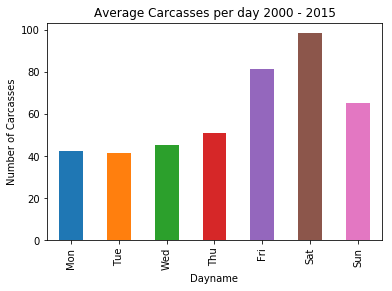

In [24]:
import calendar as cal

days = list(cal.day_abbr)

clean_data['DayofWeek'] = clean_data['Harvest_Date'].apply(lambda x: x.dayofweek)



clean_data.loc[has_date,'Dayname'] = clean_data.loc[has_date,'DayofWeek'].apply(lambda x: days[int(x)])

day_count = clean_data.groupby('Dayname')['Carcass Size'].count()/(204)

day_count.reindex(days).plot(kind='bar').set(ylabel = 'Number of Carcasses', title = 'Average Carcasses per day 2000 - 2015')



/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


[Text(0, 0.5, 'Total Carcasses'), Text(0.5, 0, 'Year')]

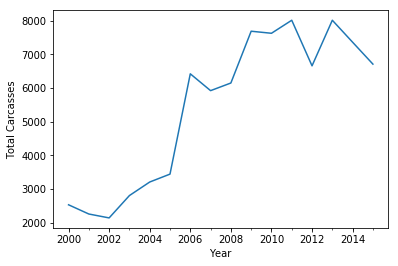

In [25]:
## Time series of number of catches over years

date_indexed_df = clean_data.set_index(pd.DatetimeIndex(clean_data['Harvest_Date']))

df_by_year = date_indexed_df.groupby(pd.TimeGrouper(freq='A'))

yearplot = df_by_year['Carcass Size'].count().plot(kind='line')

yearplot.set(xlabel='Year',ylabel='Total Carcasses')



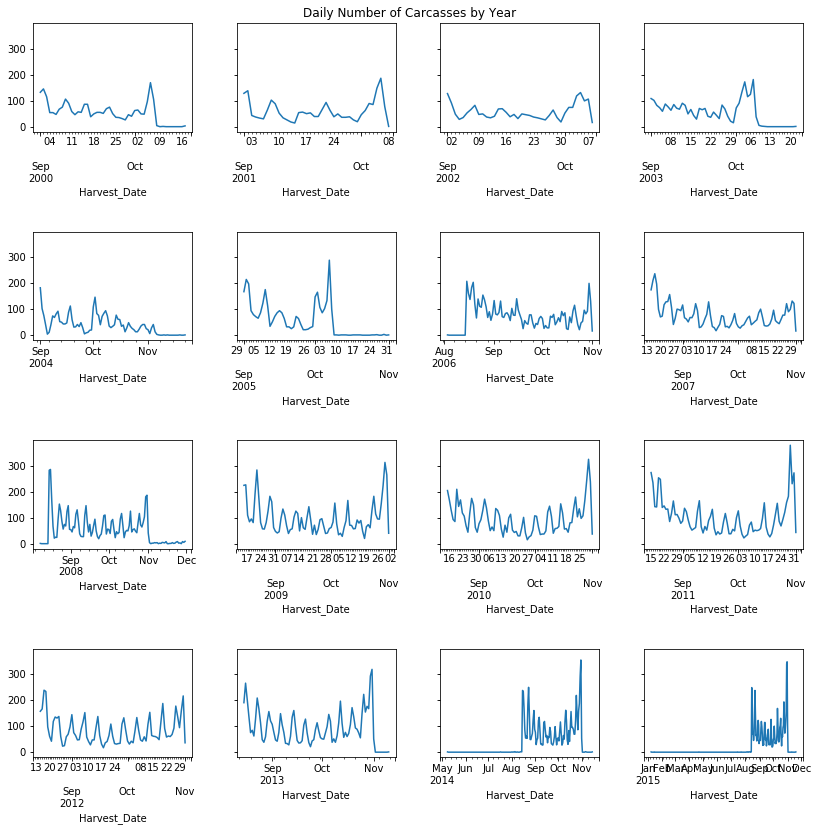

In [26]:
fig, axarray = plt.subplots(4,4,figsize = (12,12), sharey = True)

row = col = 0
for key, grp in df_by_year:
    if col == 4:
        row += 1
        col = 0
    
    grp.groupby(pd.Grouper(freq='D'))['Carcass Size'].count().plot(ax = axarray[row,col],kind='line')
    col+=1
    
plt.tight_layout(pad=3)    
plt.suptitle('Daily Number of Carcasses by Year', size = 12)
plt.show()




<h1 id="Observations">Observations<a class="anchor-link" href="#Observations">¶</a></h1><ul>
<li>There is a predictable weekday/weekend cycle</li>
<li>There is usually a peak in the harvest towards the end of the season, which in recent years has been the end of November <em>(although in 2014 and 2015 catches took place outside of the September-November window)</em></li>
<li>The total harvest has gone up dramatically year on year</li>
</ul>
<p>So, without a time machine to take us back to the quiet times around 2000-2005, the best time looks like a Monday towards the end of September.</p>



<h2 id="Where-should-I-go-hunting?">Where should I go hunting?<a class="anchor-link" href="#Where-should-I-go-hunting?">¶</a></h2>


In [27]:
## Each entry is marked with one or both of an Area Name and a Location e.g.

clean_data.iloc[87132]



Year                           2015
Area Number                     866
Area Name             WALTON COUNTY
Carcass Size                 2.6924
Harvest Date             08-23-2015
Location                 KINGS LAKE
Harvest_Date    2015-08-23 00:00:00
Month                             8
Day                              23
DayofWeek                         6
Dayname                         Sun
Name: 87132, dtype: object

In [28]:
print('There are %i distinct areas, and %i distinct locations' %(len(clean_data['Area Name'].unique()),len(clean_data['Location'].unique())))



There are 166 distinct areas, and 3577 distinct locations


In [29]:
## How many entries don't have an Area Name? 101

Area_Unknown = clean_data['Area Name'].isnull()

print(Area_Unknown.sum())

## How many entries don't have a location? 71096

Location_Unknown = clean_data['Location'].isnull()

print(Location_Unknown.sum())

## How many don't have an area or a location? 99

Location_Unknown[Area_Unknown].sum()

## Can we infer the area from the location (when there's a location but no area?)

clean_data[Area_Unknown][~Location_Unknown]



101
71145


/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location,Harvest_Date,Month,Day,DayofWeek,Dayname
17244,2006.0,406,NaN,2.8448,10-28-2006,STA-5 (406),2006-10-28,10.0,28.0,5.0,Sat
17272,2006.0,406,NaN,2.4130,09-08-2006,STA 5 (406),2006-09-08,9.0,8.0,4.0,Fri


In [30]:
## Looks like they're all from Area 406, which is sometimes called STA-5, 
## so let's just impute that and then drop any other unknown locations

clean_data.loc[clean_data['Area Number'] == 406,'Area Name'] = 'STA-5'



In [31]:
Area_Unknown = clean_data['Area Name'].isnull()

clean_data = clean_data.drop(clean_data[Area_Unknown].index)



<h4 id="Sub-Areas">Sub-Areas<a class="anchor-link" href="#Sub-Areas">¶</a></h4><p>Some of our areas have a parentheses-enclosed sub-area, which may be useful to teases out the best place. If we just say <em>'Take me to St. John's River'</em>, we're referring to somewhere along that 300 mile stretch...!</p>


In [32]:
## Here are the specific sub areas

def sub_area_search(string):
    return re.search("\((.*?)\)",string,re.I)

sub_area_col = clean_data['Area Name'].apply(lambda x: sub_area_search(x).group(1) if sub_area_search(x) else None)

sub_area_filt = clean_data['Area Name'].apply(lambda x: True if sub_area_search(x) else False)

sub_area_col[sub_area_filt].unique()



array(['POOL A', 'POOL C', 'WEST', 'SOUTH', 'NORTH', 'EAST',
       "LAKE HELL N' BLAZES", 'LAKE POINSETT', 'PUZZLE LAKE', 'WELAKA',
       'PALATKA SOUTH', 'WCAs 2A & 2B', 'WCAs 3A & 3B', 'BROADMOOR UNIT',
       'GOODWIN UNIT', 'WCA 2', 'WCA 3', 'PALATKA', 'POOL E'],
      dtype=object)

In [33]:
clean_data[sub_area_filt].groupby('Area Name').Location.agg({'Distinct Locations' :  pd.Series.nunique,
                    'Total Harvest' : pd.Series.count})



/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Distinct Locations,Total Harvest
Area Name,,
EVERGLADES & FRANCIS S. TAYLOR WMA (WCA 2),1,2
EVERGLADES & FRANCIS S. TAYLOR WMA (WCA 3),7,9
EVERGLADES & FRANCIS S. TAYLOR WMA (WCAs 2A & 2B),0,0
EVERGLADES & FRANCIS S. TAYLOR WMA (WCAs 3A & 3B),0,0
EVERGLADES WMA (WCA 2),9,13
EVERGLADES WMA (WCA 3),26,42
KISSIMMEE RIVER (POOL A),13,26
KISSIMMEE RIVER (POOL C),0,0
KISSIMMEE RIVER (POOL E),8,10



<p>Let's take a look at the range of locations for a couple of these - should we just replace the area with the (sub area)?</p>


In [34]:
clean_data[sub_area_filt][clean_data['Area Name'] == 'ST. JOHNS RIVER (WELAKA)'].groupby('Location').Year.count()



/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Location
ACCROSS FROM WEL                  1
FL                                2
LITTLE LAKE GEORGE                2
NE SIDE OF LITTLE LAKE GEORGE     2
PRIVATE PROPERTY                  4
SEVEN SISTERS IS                  1
SPORTSMANS HARBOR AREA            1
ST JOHNS                          1
ST JOHNS RIVER                    2
ST JOHNS RIVER SHELL HABOR        1
ST JOHNS RIVER-WALAKA             1
ST JOHNS WELKA                    2
ST. JOHNS RIVER                   1
St. Johns River                   1
TURKEY ISLAND COVE                1
WALAKA                            1
WELAKA                           14
WELATKA 506                       2
WELEKA                            1
WELKA                             2
Name: Year, dtype: int64


<p>So we'll just call it WELAKA as location - too much detail since they'll all have the same area code. Ultimately go back to the area code.</p>
<p>Also, looks like in most cases the location is unknown anyway</p>


In [35]:
clean_data[clean_data['Area Name'] == 'ST. JOHNS RIVER (LAKE POINSETT)' ].groupby('Location').Year.count()



Location
502                                 6
502 WASHINGTON                      1
BREVARD                             1
BREVARD COUNTY                      1
Brevard                             1
FL                                  1
LAKE  POINCETT                      1
LAKE  POINTSETTE                    1
LAKE PAINSETTE                      1
LAKE POINSET                        6
LAKE POINSETE                       1
LAKE POINSETT                      56
LAKE POINSETT NORTH                 1
LAKE POINSETTE                     15
LAKE POINTSETT                      6
LAKE PUINSATTA                      3
LAKE WASH./ POINSETT                1
LAKE WASHING 502                    1
LAKE WASHINGTON                    72
LAKE WASHINGTON 502                 1
LAKE WASHINGTON DAM                 1
LAKE WASHINGTON/POINSETT            1
LAKE WINDER                        18
LAKE WINER                          1
LAKEPOINSETT                        1
LK. WASHINGTON                      1
Lak


<p>Again, loads of locations, but the main two are Lake Poinsett and Lake Washington.</p>
<p>What's strange is that these lakes aren't particularly near each other, so maybe the location is not actually that helpful.</p>
<p>What we'll do is use the location to help indicate if the carcass was from a lake, river etc., but when looking for specific places, we'll only use the area</p>


In [36]:

## simple regex function to generate new area columns

def area_classifier(area_name, specified_area_type):
    try:
        if re.search(specified_area_type,area_name, re.I):
            return True
        else:
            return False
    except:
        return False



In [37]:
filtarea_names = ['River','Lake','County','WMA','Marsh','Pond', 'Unknown','Reservoir','^STA']



In [38]:
filt_area_dict = {}

for n in filtarea_names:
    filt_area_dict[n]=clean_data['Area Name'].apply(lambda x: area_classifier(x, n)) 


## Make these boolean filters rather than columns on the dataframe
## Start with locations where available then go on to areas
## Little River Lake is a Lake, not a river.



In [39]:
clean_data[filt_area_dict['WMA']]['Area Name'].unique()

array(['EVERGLADES WMA - 2', 'EVERGLADES WMA - 3', 'HOLEY LAND WMA',
       'GUANA RIVER WMA', 'OCALA WMA', 'THREE LAKES WMA',
       'EVERGLADES & FRANCIS S. TAYLOR WMA (WCAs 2A & 2B)',
       'EVERGLADES & FRANCIS S. TAYLOR WMA (WCAs 3A & 3B)',
       'T.M. GOODWIN WMA (BROADMOOR UNIT)',
       'T.M. GOODWIN WMA (GOODWIN UNIT)', 'EVERGLADES WMA (WCA 2)',
       'EVERGLADES WMA (WCA 3)', 'T.M. GOODWIN WMA GOODWIN UNIT)',
       'EVERGLADES & FRANCIS S. TAYLOR WMA (WCA 2)',
       'EVERGLADES & FRANCIS S. TAYLOR WMA (WCA 3)'], dtype=object)

In [40]:
filt_location_dict = {}
filtlocation_names = ['River','Lake','County','WMA','Marsh','Pond', 'Unknown','Swamp','Creek','Canal','Springs']

for n in filtlocation_names:
    
    filt_location_dict[n] = clean_data['Location'].apply(lambda x: area_classifier(x, n))



In [41]:
clean_data[filt_location_dict['Swamp']][filt_area_dict['Lake']]

/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location,Harvest_Date,Month,Day,DayofWeek,Dayname
78559,2014.0,835,LAKE COUNTY,3.5560,09-27-2014,OKAHUMPKA SWAMP,2014-09-27,9.0,27.0,5.0,Sat
78675,2014.0,835,LAKE COUNTY,2.6924,09-27-2014,OKAHUMPKA SWAMP,2014-09-27,9.0,27.0,5.0,Sat
85658,2015.0,835,LAKE COUNTY,2.1336,10-17-2015,GREEN SWAMP,2015-10-17,10.0,17.0,5.0,Sat
85703,2015.0,835,LAKE COUNTY,1.7018,10-11-2015,GREEN SWAMP,2015-10-11,10.0,11.0,6.0,Sun


In [42]:
{i:filt_location_dict[i].sum() for i in filt_location_dict}

{'River': 4282,
 'Lake': 6234,
 'County': 132,
 'WMA': 34,
 'Marsh': 46,
 'Pond': 304,
 'Unknown': 1,
 'Swamp': 149,
 'Creek': 1544,
 'Canal': 573,
 'Springs': 44}

In [43]:
## Find anything which has a double count in location (e.g. Newmans lake will look like a 'wma' and a 'lake') 
from itertools import combinations as cmb

overlap_locations = {c:(filt_location_dict[c[0]] & filt_location_dict[c[1]]) 
                     for c in cmb(filt_location_dict.keys(),2)}

overlap_locations_counts = {l:overlap_locations[l].sum() for l in overlap_locations if overlap_locations[l].sum()!=0}

overlap_locations_counts



{('River', 'Lake'): 19,
 ('River', 'County'): 9,
 ('River', 'Swamp'): 36,
 ('River', 'Creek'): 9,
 ('River', 'Canal'): 3,
 ('River', 'Springs'): 3,
 ('Lake', 'County'): 12,
 ('Lake', 'WMA'): 20,
 ('Lake', 'Marsh'): 12,
 ('Lake', 'Pond'): 7,
 ('Lake', 'Swamp'): 5,
 ('Lake', 'Creek'): 19,
 ('Lake', 'Canal'): 45,
 ('Lake', 'Springs'): 2,
 ('County', 'Pond'): 6,
 ('County', 'Creek'): 2,
 ('County', 'Canal'): 16,
 ('County', 'Springs'): 2,
 ('Pond', 'Swamp'): 1,
 ('Pond', 'Creek'): 12,
 ('Pond', 'Canal'): 19,
 ('Swamp', 'Creek'): 40,
 ('Creek', 'Canal'): 6,
 ('Creek', 'Springs'): 16}

In [44]:
overlap_locationsdata = {l:clean_data.Location[overlap_locations[l]].unique() for l in overlap_locations if overlap_locations[l].sum()!=0}

overlap_locationsdata



{('River',
  'Lake'): array(['ST JOHNS RIVER LAKE POINSETT', 'ST JOHNS RIVER LAKE WINDER',
        'ST. JOHNS RIVER (LAKE POINSETT)', 'LAKE HARNEY ST JOHNS RIVER',
        'LAKE HARNEY (ST. JOHNS RIVER)', 'ST HONS RIVER LAKE HARNEY',
        'KISS RIVER NORTH LAKE', 'SMOKEHOUSE LAKE/CHOCTACHATEE RIVER',
        'ST JOHNS RIVER/LAKE HELL N BLAZES',
        'ST JOHNS RIVER LAKE POINSETTE', 'ST JOHNS RIVER/LAKE HARNEY',
        'MANATEE RIVER/LAKE MANATEE EAST OF VERNA BETHANY R',
        'choctawhatchee river-- inside lake', 'LITTLE RIVER LAKE'],
       dtype=object),
 ('River',
  'County'): array(['CLAY COUNTY, ST. JOHNS RIVER', 'NORTH INDIAN RIVER COUNTY',
        'NASSAU COUNTY, ST MARYS RIVER', 'OKALOOSA COUNTY, YELLOW RIVER',
        'River/creek off of county rd 67',
        'Escambia River (santa rosa county side)',
        'escambia River (santa rosa county side)'], dtype=object),
 ('River', 'Swamp'): array(['SIMPSON RIVER, ESCAMBIA RIVER SWAMP',
        'WHITE RIVER, ESCAMBIA RI

In [45]:
## Find anything which has a double count in Area (e.g. Newmans lake)

overlap_area = {c:(filt_area_dict[c[0]] & filt_area_dict[c[1]]) 
                     for c in cmb(filt_area_dict.keys(),2)}

overlap_area_counts = {l:overlap_area[l].sum() for l in overlap_area if overlap_area[l].sum()!=0}

overlap_area_counts



{('River', 'Lake'): 9763,
 ('River', 'County'): 39,
 ('River', 'WMA'): 153,
 ('Lake', 'County'): 2466,
 ('Lake', 'WMA'): 176}

In [46]:
overlap_areadata = {l:clean_data['Area Name'][overlap_area[l]].unique() for l in overlap_area if overlap_area[l].sum()!=0}

overlap_areadata



{('River', 'Lake'): array(["ST. JOHNS RIVER (LAKE HELL N' BLAZES)",
        'ST. JOHNS RIVER (LAKE POINSETT)', 'ST. JOHNS RIVER (PUZZLE LAKE)'],
       dtype=object),
 ('River', 'County'): array(['INDIAN RIVER COUNTY'], dtype=object),
 ('River', 'WMA'): array(['GUANA RIVER WMA'], dtype=object),
 ('Lake', 'County'): array(['LAKE COUNTY'], dtype=object),
 ('Lake', 'WMA'): array(['THREE LAKES WMA'], dtype=object)}

<h3 id="This-counting-thing-is-never-going-to-be-100%-correct,-unless-we-went-through-and-relabelled-these-by-hand.">This counting thing is never going to be 100% correct, unless we went through and relabelled these by hand.<a class="anchor-link" href="#This-counting-thing-is-never-going-to-be-100%-correct,-unless-we-went-through-and-relabelled-these-by-hand.">¶</a></h3><p>We're not going to do that, so we'll make clear a few <em>sensible</em> rules that we're following to do the counting:</p>
<h4 id="1.-Prioritise-the-Location-before-the-Area">1. Prioritise the Location before the Area<a class="anchor-link" href="#1.-Prioritise-the-Location-before-the-Area">¶</a></h4><h4 id="2.-Dealing-with-Double-labelled-Locations">2. Dealing with Double labelled <em>Locations</em><a class="anchor-link" href="#2.-Dealing-with-Double-labelled-Locations">¶</a></h4><ul>
<li>If it's a county, use the other label</li>
<li>If it's a lake and a river, call it a lake</li>
<li>If it's a lake and a WMA, it's a lake</li>
<li>If it's labelled as a creek, pond, canal, swamp or marsh and something else, ignore the other thing. </li>
</ul>
<h4 id="3.-Dealing-with-double-labelled-Areas">3. Dealing with double labelled <em>Areas</em><a class="anchor-link" href="#3.-Dealing-with-double-labelled-Areas">¶</a></h4><ul>
<li>If it's a county, use the other label</li>
<li>If it's a lake and a river, it's a lake</li>
<li>If it's a WMA and something else, ignore the other thing</li>
</ul>
<h4 id="4.-Where-there-are-different-labels-across-the-Area-and-Location,-take-the-Location">4. Where there are different labels across the Area and Location, take the Location<a class="anchor-link" href="#4.-Where-there-are-different-labels-across-the-Area-and-Location,-take-the-Location">¶</a></h4><h4 id="5.-If-you-still-can't-classify-it,-it's-just-somewhere-in-the-county.-Hollows,-pools,-ditches-or-2-miles-down-from-Eureka,-them-gators-get-everywhere!">5. If you still can't classify it, it's just somewhere in the county. Hollows, pools, ditches or 2 miles down from Eureka, them gators get everywhere!<a class="anchor-link" href="#5.-If-you-still-can't-classify-it,-it's-just-somewhere-in-the-county.-Hollows,-pools,-ditches-or-2-miles-down-from-Eureka,-them-gators-get-everywhere!">¶</a></h4>


In [47]:
conditions = [
    filt_location_dict['Creek'],
    filt_location_dict['Canal'],
    filt_location_dict['Springs'],
    filt_location_dict['Pond'],
    filt_location_dict['Swamp'],
    filt_location_dict['Marsh'],
    filt_location_dict['Lake'],
    filt_location_dict['River'],
    filt_location_dict['WMA'],
    filt_area_dict['WMA'],
    filt_area_dict['^STA'],
    filt_area_dict['Marsh'],
    filt_area_dict['Reservoir'],
    (filt_area_dict['Lake']) & (filt_area_dict['County']),
    (filt_area_dict['River']) & (filt_area_dict['County']),
    filt_area_dict['Lake'],
    filt_area_dict['River'],
    filt_area_dict['County']]

choices = ['Creek','Canal','Springs','Pond', 'Swamp', 'Marsh','Lake','River','WMA','WMA','STA','Marsh','Reservoir','County','County','Lake','River','County']

clean_data['geography'] = np.select(conditions, choices, default='Unknown')



In [48]:
clean_data[clean_data['geography'] == 'Unknown']['Carcass Size'].count()



463

In [49]:
### So we've got about 0.5% carcasses with no geography

clean_data[clean_data['geography'] == 'Unknown'].groupby(['Area Number','Area Name'])['Carcass Size'].count().sort_values(ascending = False)



Area Number  Area Name                             
542          BLUE CYPRESS WATER MANAGEMENT AREA        340
112          TENEROC FMA                                39
401          A.R.M. LOXAHATCHEE NWR                     36
546          T.M. GOODWIN WATERFOWL MANAGEMENT AREA     29
112          TENOROC FMA                                15
839          LIBERTY                                     2
819          FRANKLIN                                    2
Name: Carcass Size, dtype: int64

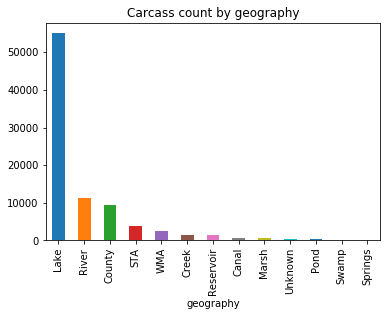

In [50]:
clean_data.groupby('geography')['Carcass Size'].count().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                            title = 'Carcass count by geography')



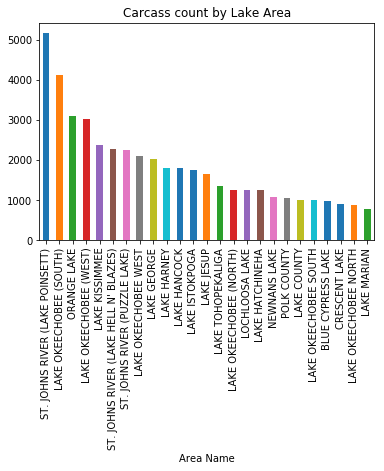

In [51]:
clean_data[clean_data['geography'] == 'Lake'].groupby('Area Name')['Carcass Size'
                                            ].count().sort_values(ascending = False)[:25].plot(kind = 'bar', 
                                                                                    title = 'Carcass count by Lake Area')



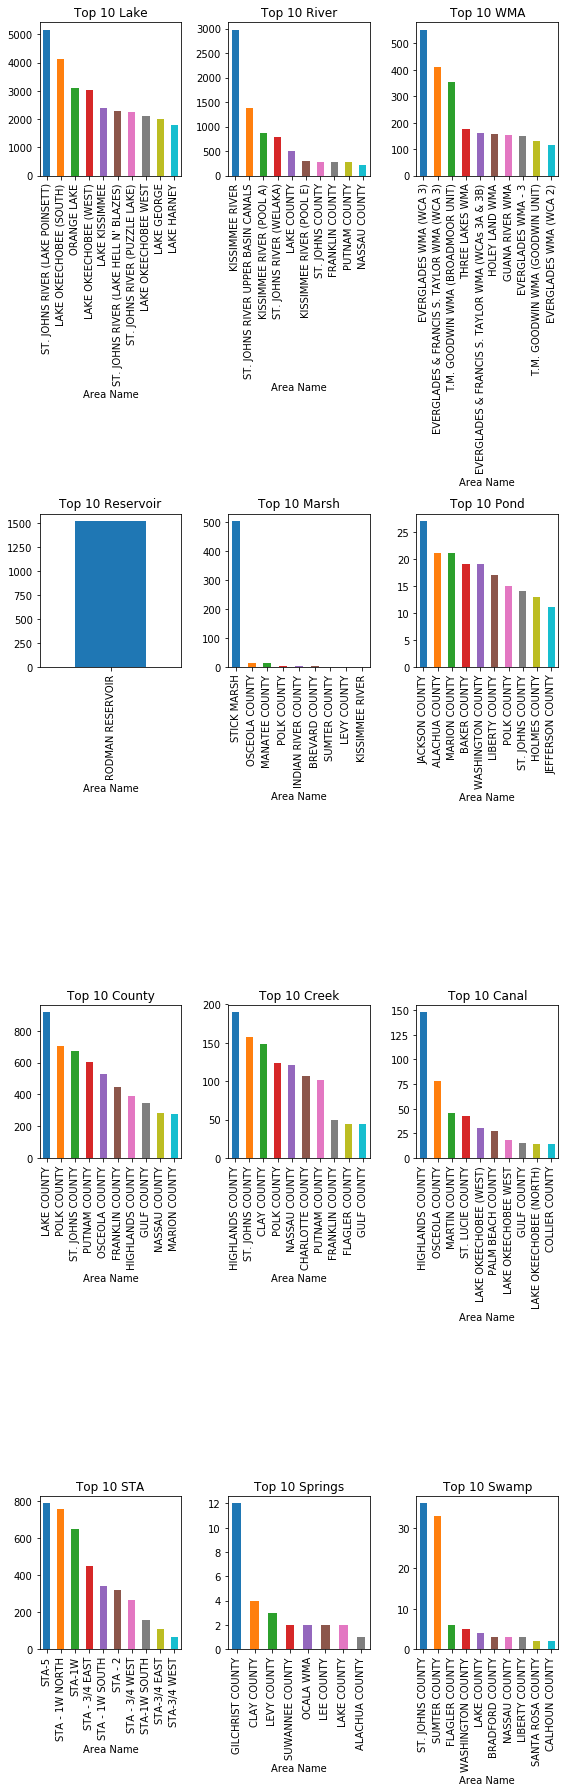

In [52]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3,figsize = (8,25))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

geography_names = list(clean_data['geography'].unique())

geography_names.remove('Unknown')

for i, area in enumerate(geography_names):
    try:
        d = clean_data[clean_data.geography == area].groupby(['Area Name'])['Carcass Size'
                                ].count().sort_values(ascending = False)
        if len(d) > 10:
            d[:10].plot(ax = axes[i],kind = 'bar', title = 'Top 10 %s' %area)

        else:
            d.plot(ax = axes[i],kind = 'bar', title = 'Top 10 %s' %area)
    except:
        pass
    
    
plt.tight_layout()
plt.show()




<h3 id="Range-of-sizes">Range of sizes<a class="anchor-link" href="#Range-of-sizes">¶</a></h3>


In [53]:

#average size over time
#range of sizes vs geography
#range of sizes vs top locations



In [54]:
## first off, identify any lines where the Carcass Size is 0

zero_size = clean_data[clean_data['Carcass Size']==0].index

## fill these missing data points with the average Carcass Size

clean_data.loc[zero_size,'Carcass Size'] = clean_data[clean_data['Carcass Size']!=0]['Carcass Size'].mean()



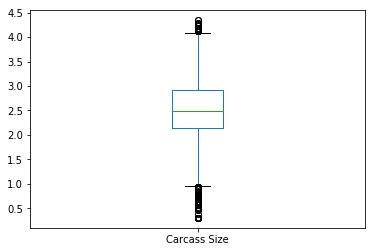

In [55]:
clean_data['Carcass Size'].plot(kind='box')



In [56]:
## Identify the biggest catches ever

clean_data[clean_data['Carcass Size'] == clean_data['Carcass Size'].max()]



,Year,Area Number,Area Name,Carcass Size,Harvest Date,Location,Harvest_Date,Month,Day,DayofWeek,Dayname,geography
44996,2010.0,502,ST. JOHNS RIVER (LAKE POINSETT),4.3434,10-31-2010,NaN,2010-10-31,10.0,31.0,6.0,Sun,Lake
78315,2014.0,828,HIGHLANDS COUNTY,4.3434,10-28-2014,LITTLE RED WATER LAKE,2014-10-28,10.0,28.0,1.0,Tue,Lake


In [57]:
## Which locations have the most 4m (14 feet) or greater alligators?

clean_data[clean_data['Carcass Size'] >= 4].groupby(['Area Name'])['Carcass Size'].count().sort_values(ascending = False)[:10]



Area Name
LAKE GEORGE               10
PUTNAM COUNTY              8
LAKE JESUP                 5
LAKE TOHOPEKALIGA          5
LAKE COUNTY                5
HIGHLANDS COUNTY           5
CRESCENT LAKE              4
LAKE OKEECHOBEE (WEST)     4
LAKE GRIFFIN               3
KISSIMMEE RIVER            3
Name: Carcass Size, dtype: int64

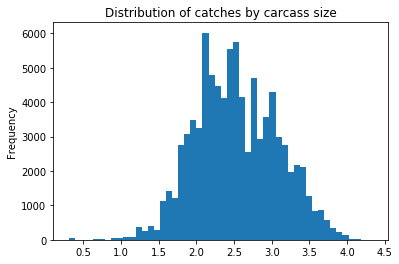

In [58]:
clean_data['Carcass Size'].plot(kind='hist',bins = 50, title = 'Distribution of catches by carcass size')



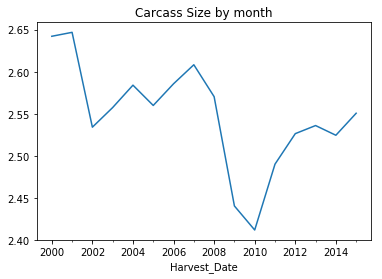

In [59]:
df_by_year['Carcass Size'].mean().plot(title = 'Carcass Size by month')




<p>Interesting to note the dip in size around 2010.</p>


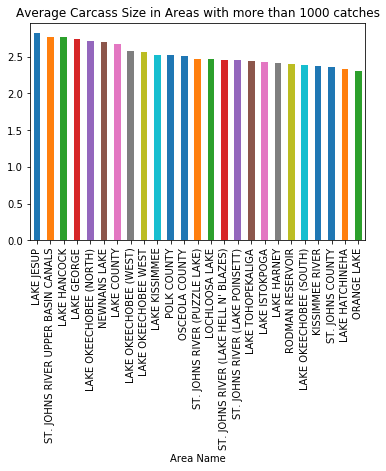

In [65]:
clean_data.groupby(['Area Name']).filter(lambda x: x['Carcass Size'].count() > 1000
                                        ).groupby(['Area Name'])['Carcass Size'].mean(
                                        ).sort_values(ascending = False).plot(kind='bar', title='Average Carcass Size in Areas with more than 1000 catches')



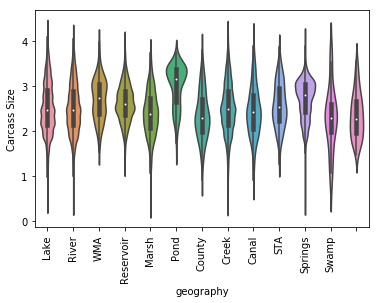

In [68]:
plot = sns.violinplot(x = clean_data['geography'], y = clean_data['Carcass Size'])

plot.set_xticklabels(labels = geography_names,rotation = 90)

plt.show()


<p>What about if I want to look for some smaller Alligators to get my eye in first?</p>


In [62]:
clean_data.groupby(['Area Name'])['Carcass Size'].agg({'average size': 'mean'}).sort_values(by='average size',ascending = True)[:10]



/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,average size
Area Name,
BRADFORD COUNTY,2.168309
FRANKLIN,2.171700
BAKER COUNTY,2.225239
UNION COUNTY,2.236519
LAKE ROUSSEAU,2.245573
SUWANNEE COUNTY,2.249251
OKALOOSA COUNTY,2.251529
PEACE RIVER NORTH,2.257245
WASHINGTON COUNTY,2.275885


In [63]:
print(clean_data['Carcass Size'].min())

clean_data[clean_data['Carcass Size'] <= 1].groupby(['Area Name']
                            )['Carcass Size'].agg({'Number of catches less than 1m':'count'}
                            ).sort_values(by='Number of catches less than 1m',ascending = False)[:10]



0.3048


/home/tms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,Number of catches less than 1m
Area Name,
ORANGE LAKE,23
KISSIMMEE RIVER,11
ST. JOHNS RIVER (PUZZLE LAKE),10
LAKE OKEECHOBEE (SOUTH),10
LAKE HARNEY,9
LOCHLOOSA LAKE,9
LAKE TOHOPEKALIGA,7
LAKE OKEECHOBEE (WEST),6
LAKE HATCHINEHA,6



<p>So, if you're looking for some big gators, get down to Lake Jesup (biggest average catch) or Lake George (most catches above 4m), and if you want something smaller to start off with, get to Bradford County (smallest average catch) or Orange Lake (largest number of catches less than 1m)</p>



<h1 id="Awwww,-SNAP...-That's-all-we've-got-time-for.-Catch-ya'">Awwww, SNAP... That's all we've got time for. Catch ya'<a class="anchor-link" href="#Awwww,-SNAP...-That's-all-we've-got-time-for.-Catch-ya'">¶</a></h1>



<p>Tom Merritt Smith 2017</p>
<p>Newcastle-upon-Tyne, UK</p>
<p>Get in touch: tmerrittsmith (at) gmail (dot) com</p>


#### Postscript: March, 2019

A few things I would do next time:

- map some of this stuff
- consider something like vega/altair to make interactive plots